<a href="https://colab.research.google.com/github/sainikhilrai/Deep-Learning/blob/master/basicNN_v1.1_range(10).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras

Using TensorFlow backend.


In [0]:
# OM SRI SAI RAM

# Descr: Basic or experiment code to perform loss reserve prediction

##############################
# Step 1 : Reading Sample Data
##############################

import numpy as np
import random
import sklearn
import os

from sklearn.preprocessing import LabelEncoder

os.environ["KERAS_BACKEND"] = "theano"
np.random.seed(7)
random.seed(7)
accident_years = np.arange(2005,2013,1)
development_years = np.arange(0,8,1)
triangle = np.array(([1232,946,520,722,316,165,48,14],
                   [1469,1201,708,845, 461,235,56,18],
                   [1652,1416,959,954,605,287,69,21],
                   [1831,1634,1124,1087,725,314,79,24],
                   [2074,1919,1330,1240,756,359,91,28],
                   [2434,2263,1661,1540,909,432,109,33],
                   [2810,2108,1544,1565,924,439,111,34],
                   [3072,2614,1785,1810,1069,508,128,39]))


In [3]:
print(' Accident Years',accident_years)
print(' Developement Years',development_years)
print(' Input', triangle)


 Accident Years [2005 2006 2007 2008 2009 2010 2011 2012]
 Developement Years [0 1 2 3 4 5 6 7]
 Input [[1232  946  520  722  316  165   48   14]
 [1469 1201  708  845  461  235   56   18]
 [1652 1416  959  954  605  287   69   21]
 [1831 1634 1124 1087  725  314   79   24]
 [2074 1919 1330 1240  756  359   91   28]
 [2434 2263 1661 1540  909  432  109   33]
 [2810 2108 1544 1565  924  439  111   34]
 [3072 2614 1785 1810 1069  508  128   39]]


In [0]:
newTriangle= np.zeros([8,8])
for i in range(triangle.shape[0]):
  for j in range(triangle.shape[1]-i):
    newTriangle[i,j]= triangle[i,j]



In [5]:
print(newTriangle)

[[1232.  946.  520.  722.  316.  165.   48.   14.]
 [1469. 1201.  708.  845.  461.  235.   56.    0.]
 [1652. 1416.  959.  954.  605.  287.    0.    0.]
 [1831. 1634. 1124. 1087.  725.    0.    0.    0.]
 [2074. 1919. 1330. 1240.    0.    0.    0.    0.]
 [2434. 2263. 1661.    0.    0.    0.    0.    0.]
 [2810. 2108.    0.    0.    0.    0.    0.    0.]
 [3072.    0.    0.    0.    0.    0.    0.    0.]]


In [6]:
# Cum calc
C = np.zeros(shape=(np.shape(triangle)[0],np.shape(triangle)[1]))
for i in range(np.shape(triangle)[0]):
    for j in range(np.shape(triangle)[1]):
        C[i,j] = sum(triangle[i,:j+1])

print('C',C)

C [[ 1232.  2178.  2698.  3420.  3736.  3901.  3949.  3963.]
 [ 1469.  2670.  3378.  4223.  4684.  4919.  4975.  4993.]
 [ 1652.  3068.  4027.  4981.  5586.  5873.  5942.  5963.]
 [ 1831.  3465.  4589.  5676.  6401.  6715.  6794.  6818.]
 [ 2074.  3993.  5323.  6563.  7319.  7678.  7769.  7797.]
 [ 2434.  4697.  6358.  7898.  8807.  9239.  9348.  9381.]
 [ 2810.  4918.  6462.  8027.  8951.  9390.  9501.  9535.]
 [ 3072.  5686.  7471.  9281. 10350. 10858. 10986. 11025.]]


In [7]:
l_encode = LabelEncoder()
l_encode.fit(accident_years)
a_yr = l_encode.transform(accident_years)
l_encode.fit(development_years)
dev_yr = l_encode.transform(development_years)

print(a_yr)
print(dev_yr)


[0 1 2 3 4 5 6 7]
[0 1 2 3 4 5 6 7]


In [0]:
train_data = []
for i in range(np.shape(triangle)[0]):
    for j in range(np.shape(triangle)[1]-i):
        train_data.append([a_yr[i],dev_yr[j],C[i,j]])
        
test_data = []
for i in range(1,np.shape(triangle)[0]):
    for j in range(np.shape(triangle)[1]-i,np.shape(triangle)[1]):
        test_data.append([a_yr[i],dev_yr[j],C[i,j]])

 
#convert trainData and testData into numpyArray
#train_data = np.array(train_data)
test_data = np.array(test_data)


In [0]:
######################################################
############## code for the bootstrap  ###############
######################################################



#code for generating the other triangle


for iteratrion in range(100):
  newTriangle2= np.zeros((triangle.shape[0],triangle.shape[1]))
  for i in range(triangle.shape[0]):
    for j in range(triangle.shape[1]-i):
        newTriangle2[i,j]= newTriangle[i,j] + np.random.randint(-10,10)  #add some random value
  difference= newTriangle2-newTriangle   #take the error
  
  
  
  #get the column of the difference
  columncount=triangle.shape[1]
  for columnIndex in range(triangle.shape[1]):
    column= difference[:columncount,columnIndex]   #get the column of the error matrix
    np.random.shuffle(column)                      # shuffle the column
    newTriangle[:columncount,columnIndex]= newTriangle[:columncount,columnIndex]+ column    #get the bootstrap sample
    columncount= columncount-1
    
  #print("Bootstrap New Triangle:\n")
  #print(newTriangle)
  
  #find the cumulative sum of new Bootstrap New Triangle
  # Cum calc
  newC = np.zeros(shape=(np.shape(triangle)[0],np.shape(triangle)[1]))
  for i in range(np.shape(triangle)[0]):
    for j in range(np.shape(newTriangle)[1]):
        newC[i,j] = sum(newTriangle[i,:j+1])

  
  
  #combine the new triangle with the already existing training set
  
  for i in range(np.shape(triangle)[0]):
    for j in range(np.shape(triangle)[1]-i):
        train_data.append([a_yr[i],dev_yr[j],newC[i,j]])
  

In [10]:
train_data= np.array(train_data)
train_data.shape
#train_data[71,:]

(3636, 3)

In [0]:
##############
# define the loss function
################

def poisson_dev(y_true, y_pred):
    return 2*K.mean(y_pred - y_true -y_true*(K.log(K.clip(y_pred,K.epsilon(),None)) -K.log(K.clip(y_true,K.epsilon(),None))),axis=-1)

In [0]:
#############################################
# Step 3: Build Model using Neural Networks
#############################################

import keras
import keras.backend as K
from keras.layers import Input, Dense, Dropout
from keras.models import Model, Sequential
from keras import optimizers

In [13]:
model = Sequential()
ip_dim = 2
#model.add(Dropout(0.1, input_shape=(ip_dim,))
model.add(Dense(2, input_dim=ip_dim, kernel_initializer='normal', activation='relu'))
model.add(Dense(20, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(2, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal',activation="exponential"))
# Compile model
model.compile(loss=poisson_dev, optimizer='adam',metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [14]:
history = model.fit(x=train_data[:,:ip_dim], y=train_data[:,ip_dim], batch_size=1, epochs=300, verbose=1, callbacks=None, validation_split=0.33, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None)


Instructions for updating:
Use tf.cast instead.
Train on 2436 samples, validate on 1200 samples
Epoch 1/300
2436/2436 [==============================] - 4s 2ms/step - loss: 11091.0535 - acc: 0.0000e+00 - val_loss: 3074.3167 - val_acc: 0.0000e+00
Epoch 2/300
2436/2436 [==============================] - 3s 1ms/step - loss: 5131.1902 - acc: 0.0000e+00 - val_loss: 1480.7429 - val_acc: 0.0000e+00
Epoch 3/300
2436/2436 [==============================] - 3s 1ms/step - loss: 3797.5152 - acc: 0.0000e+00 - val_loss: 1339.9308 - val_acc: 0.0000e+00
Epoch 4/300
2436/2436 [==============================] - 3s 1ms/step - loss: 2857.1295 - acc: 4.1051e-04 - val_loss: 770.2567 - val_acc: 0.0017
Epoch 5/300
2436/2436 [==============================] - 3s 1ms/step - loss: 2454.6182 - acc: 0.0000e+00 - val_loss: 455.1671 - val_acc: 0.0000e+00
Epoch 6/300
2436/2436 [==============================] - 3s 1ms/step - loss: 2046.6083 - acc: 4.1051e-04 - val_loss: 220.4509 - val_acc: 0.0000e+00
Epoch 7/300
2436

In [15]:
###########################################
# Step 4: Model Prediction
#############################################
out = model.predict(test_data[:,:2])
print(out)

[[ 6205.791 ]
 [ 5988.867 ]
 [ 7042.1426]
 [ 5779.526 ]
 [ 6795.984 ]
 [ 7991.209 ]
 [ 5577.502 ]
 [ 6558.436 ]
 [ 7711.883 ]
 [ 9068.188 ]
 [ 5382.54  ]
 [ 6329.1855]
 [ 7442.3135]
 [ 8751.209 ]
 [10290.314 ]
 [ 5194.3926]
 [ 6107.948 ]
 [ 7182.1665]
 [ 8445.311 ]
 [ 9930.605 ]
 [11677.135 ]
 [ 5012.8223]
 [ 5894.4443]
 [ 6931.12  ]
 [ 8150.1113]
 [ 9583.49  ]
 [11268.96  ]
 [13250.856 ]]


In [16]:
out.shape

(28, 1)

In [17]:
#################################
# Step 5 : Reserve calculation
#################################

import matplotlib.pyplot as plt
#print(' Test Data',test_data)
#print('pred', model.predict([2,]))
#print('C',C)
true_reserve = 0
for i in range(1,np.shape(triangle)[0]):
    j = np.shape(triangle)[1]-1-i
    #print(i,j)
    #print('last known',C[i,j])
    #print(' last estimate',C[i,np.shape(triangle)[1]-1])
    true_reserve += (C[i,np.shape(triangle)[1]-1] - C[i,j])
    #print(true_reserve)
print(" True reserve",true_reserve)


 True reserve 17352.0


In [0]:
appended= np.array(list(zip(test_data,np.ravel(out))))
len(appended)

out_dict = {}
for i in range(len(appended)):
    #print(tuple(appended[i,0][:2]))
    #print(appended[i,1])
    out_dict[tuple(appended[i,0][:2])] = appended[i,1]



In [0]:
pred_reserve = 0
final_pred = []
actuals = []
for i in range(1,np.shape(triangle)[0]):
    j = int(np.shape(triangle)[1]-1-i)    
    #print(i,j)
    #print('last known',C[i,j])
    #print(' last pred', out_dict[(i,np.shape(triangle)[1]-1)])
    #print(' last estimate',C[i,np.shape(triangle)[1]-1])
    final_pred.append(out_dict[(i,np.shape(triangle)[1]-1)] - C[i,j])
    actuals.append(C[i,np.shape(triangle)[1]-1] - C[i,j])
    pred_reserve += (out_dict[(i,np.shape(triangle)[1]-1)] - C[i,j])

In [0]:
#find the predicted 

In [21]:
print(" Predicted reserve",pred_reserve)
print(' Bias',pred_reserve - true_reserve)
print("Bias perct:",(pred_reserve-true_reserve)/true_reserve)


 Predicted reserve 27365.63671875
 Bias 10013.63671875
Bias perct: 0.5770883309560858


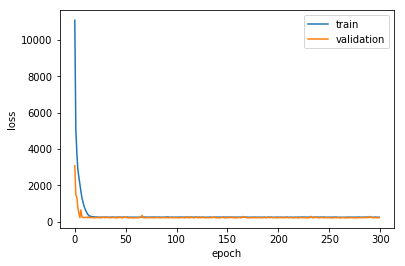

In [24]:
#ploting the loss of Neural Network
from matplotlib import pyplot

#training loss and validation loss
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.xlabel('epoch')
pyplot.ylabel('loss')
pyplot.legend(['train','validation'],loc='upper right')
pyplot.show()

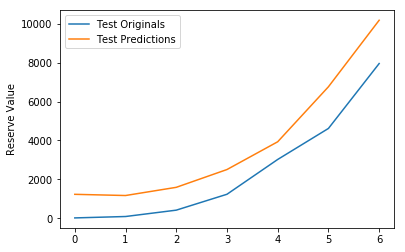

In [22]:
#plot showing predicted value vs actual value
plt.figure()
plt.plot(actuals, label = "Test Originals")
plt.plot(final_pred, label ="Test Predictions")
plt.ylabel("Reserve Value")
plt.legend()
plt.show()


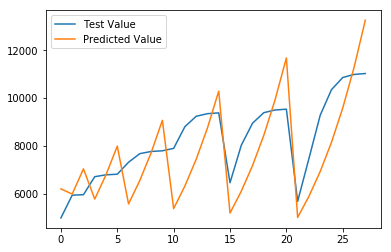

In [23]:
#############################################
# Step 6 : Not required but it is just error/prediction display for other values (accident and devlopment year combo)
#######################################################

from sklearn.metrics import mean_absolute_error as mae
import matplotlib.pyplot as plt

#print(" Pred", np.ravel(out))
#print(" Actual", test_data[:,2])
#print(" Prediction      Actual")
#print(np.array(zip(np.ravel(out),test_data[:,2])))

#plot for the predicted and the test lower triangle
plt.plot(test_data[:,2],label='Test Value')
plt.plot(out,label='Predicted Value')
plt.legend()
